<a href="https://colab.research.google.com/github/SOUMEE2000/ML-guidelines/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
source="https://medium.com/analytics-vidhya/natural-language-processing-from-scratch-sentiment-analysis-e09711d4f7eb"

In [ ]:
!unzip IMDB.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('IMDB Dataset.csv')
df.head()

In [ ]:
df["sentiment"]

In [ ]:
c_pos=0
c_neg=0

for i in df["sentiment"]:
    if i=="positive":
        c_pos=c_pos+1
    else:
        c_neg= c_neg+1

print("Positive: {}" .format(c_pos))
print("Negative: {}".format(c_neg))

In [ ]:
feature=[]
for i in df["sentiment"]:
    if i== "positive":
        feature.append(1)
    elif i =="negative":          # if "negative" was not specified, length of df wouldn't match with len(features)
        feature.append(0)


In [ ]:
df.head()

In [ ]:
len(feature)

In [ ]:
len(df["sentiment"])

In [ ]:
df["feature"]=feature

In [ ]:
df.head()

In [ ]:
df['review_processed'] = df['review'].str.replace("[^a-zA-Z#]", " ") 

In [ ]:
df.head()

In [ ]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

In [ ]:
# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','the']

In [ ]:
stop_words.extend(add_words)

In [ ]:
stop_words

In [ ]:
review="how are you?"
word_tokenize(review)

In [ ]:
# Function to remove stop words 
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

In [ ]:
df.head()

,review,sentiment,feature,review_processed
0,One of the other reviewers has mentioned that ...,positive,1,reviewers mentioned watching oz episode hooked...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visually stunnin...


In [ ]:
# Replacing short words
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
df.head()

,review,sentiment,feature,review_processed
0,One of the other reviewers has mentioned that ...,positive,1,reviewers mentioned watching episode hooked ri...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visually stunnin...


In [ ]:
df.head()

,review,sentiment,feature,review_processed
0,One of the other reviewers has mentioned that ...,positive,1,reviewers mentioned watching episode hooked ri...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visually stunnin...


In [ ]:
# Begin Lemmatization 
#from nltk.stem import WordNetLemmatizer
#from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
#lemmatizer = WordNetLemmatizer()

In [ ]:
df.head()

,review,sentiment,feature,review_processed
0,One of the other reviewers has mentioned that ...,positive,1,reviewers mentioned watching episode hooked ri...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visually stunnin...


In [ ]:
"""# Begin Lemmatization 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet') # Run atleast once 
nltk.download('averaged_perceptron_tagger')
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))"""

'# Begin Lemmatization \nfrom nltk.stem import WordNetLemmatizer\nfrom nltk.corpus import wordnet\nnltk.download(\'wordnet\') # Run atleast once \nnltk.download(\'averaged_perceptron_tagger\')\n# function to convert nltk tag to wordnet tag\nlemmatizer = WordNetLemmatizer()\n\n# Finds the part of speech tag\ndef nltk_tag_to_wordnet_tag(nltk_tag):\n    if nltk_tag.startswith(\'J\'):\n        return wordnet.ADJ\n    elif nltk_tag.startswith(\'V\'):\n        return wordnet.VERB\n    elif nltk_tag.startswith(\'N\'):\n        return wordnet.NOUN\n    elif nltk_tag.startswith(\'R\'):\n        return wordnet.ADV\n    else:          \n        return None\n\n# lemmatize sentence using pos tag\ndef lemmatize_sentence(sentence):\n    #tokenize the sentence and find the POS tag for each token\n    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  \n    #tuple of (token, wordnet_tag)\n    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)\n    lemmatized_sente

In [ ]:
# Plotting most frequent words

import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist


In [ ]:
all_words_df = df[df['feature'] == 1]

In [ ]:
df[df['feature'] == 1]

,review,sentiment,feature,review_processed
0,One of the other reviewers has mentioned that ...,positive,1,reviewers mentioned watching episode hooked ri...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,1,probably time favorite story selflessness sacr...
...,...,...,...,...
49983,"I loved it, having been a fan of the original ...",positive,1,loved fan original series always wondered back...
49985,Imaginary Heroes is clearly the best film of t...,positive,1,imaginary heroes clearly best year complete ut...
49989,I got this one a few weeks ago and love it! It...,positive,1,got weeks ago love modern light filled true co...
49992,John Garfield plays a Marine who is blinded by...,positive,1,john garfield plays marine blinded grenade fig...


In [ ]:
# Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df ['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

In [ ]:

words_df

FreqDist({'reviewers': 218,
          'mentioned': 511,
          'watching': 3814,
          'episode': 1944,
          'hooked': 218,
          'right': 3307,
          'exactly': 918,
          'happened': 915,
          'first': 9230,
          'thing': 3395,
          'struck': 171,
          'brutality': 94,
          'unflinching': 26,
          'scenes': 4881,
          'violence': 1049,
          'set': 2509,
          'word': 810,
          'trust': 312,
          'show': 6743,
          'faint': 44,
          'hearted': 280,
          'timid': 32,
          'pulls': 243,
          'punches': 72,
          'regards': 86,
          'drugs': 370,
          'sex': 1327,
          'hardcore': 104,
          'classic': 2351,
          'use': 1708,
          'called': 1240,
          'nickname': 31,
          'given': 1655,
          'oswald': 25,
          'maximum': 47,
          'security': 153,
          'state': 554,
          'penitentary': 2,
          'focuses': 230,
      

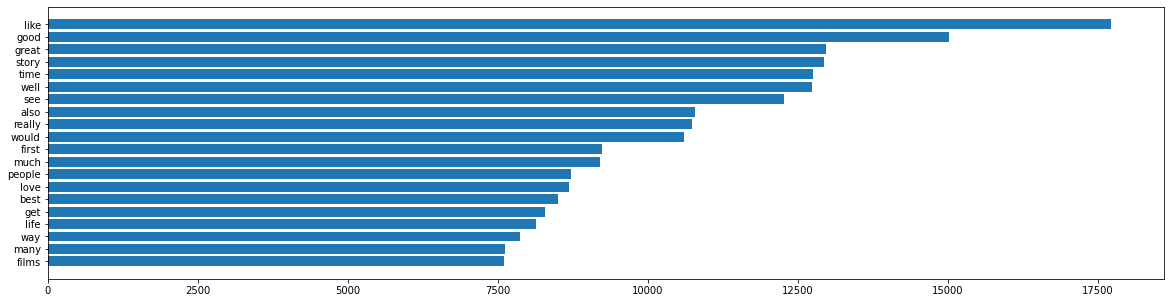

In [ ]:
# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})

# Subsets top 30 words by frequency
words_df = words_df.nlargest(n=20,columns="count") 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating sparse matrix of top 2500 tokens
cv = TfidfVectorizer(max_features = 2500)
X = cv.fit_transform(df.review_processed).toarray()
y = df.feature.values


In [ ]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.svm import SVC
classifier= SVC(kernel="linear")
classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[4373  662]
 [ 601 4364]]
The model accuracy is 0.8737


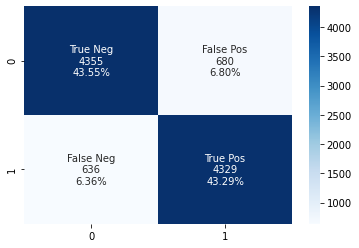

In [ ]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
# naive bayes(GuassianNB) = 75.85%
#  ,,   ,,   (MultinomialNB)= 83.91%
# ,,     ,,  (ComplementNB)= 83.91%
# svm using minmax scaler 86.84%(Count Vectorizer)
# svm using minmax scaler 86.96%(Tfidf vectoriser)
# SGDClassifier(loss="hinge") minmax scaler( without lemmatisation, with tdidf)= 74.55%
# svm using minmax scaler 87.37%(without lemmatisation, proper stowords, with tfidf)

In [ ]:
#from pynput.mouse import Button, Controller
# import time
# mouse = Controller()
# while True:
#      mouse.click(Button.left,1)
#      time.sleep(30)

# Run in machine to keep it running